# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

In [212]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

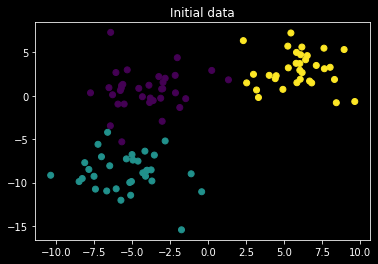

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
def cacl_euclidean_distance(q, p):
    q = np.array(q)
    p = np.array(p)
    return ((q - p) ** 2).sum() ** (1 / 2)

In [261]:
def funct_kNN(x_train, y_train, x_test, k):
    table = np.vstack((x_train.transpose(), y_train, np.zeros(y_train.shape))).transpose()
    y_test = np.zeros(x_test.shape[0])
    class_index = table.shape[1] - 2
    for i in range(x_test.shape[0]):
        for j in range(table.shape[0]):
            table[j, -1] = cacl_euclidean_distance(x_test[i], table[j, :-2])
        df = pd.DataFrame(table)
        df = df.sort_values(len(df.columns)-1) #по длине
        counts = pd.DataFrame(pd.value_counts(df[class_index][1 : k+1])) #подсчет классов
        same_count = counts[counts == counts.values[0,0]].count()[class_index] # :(
        y_test[i] = np.random.choice(counts.index[:same_count])
    return y_test

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [262]:
res = funct_kNN(X[:70], Y[:70], X[70:], 1)

In [263]:
k = 1
train_count = 70
res = funct_kNN(X[:train_count], Y[:train_count], X[train_count:], k)
mask = np.zeros(res.shape[0])
for i in range(res.shape[0]):
    mask[i] = res[i] == Y[train_count:][i]

Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне \[0, 5\] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне \[0, 5\] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [0]:
# code here

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.